In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
d = pd.read_excel('mode1.xlsx')
d.head()

,X
0,95.795
1,235.536
2,125.419
3,194.497
4,124.638


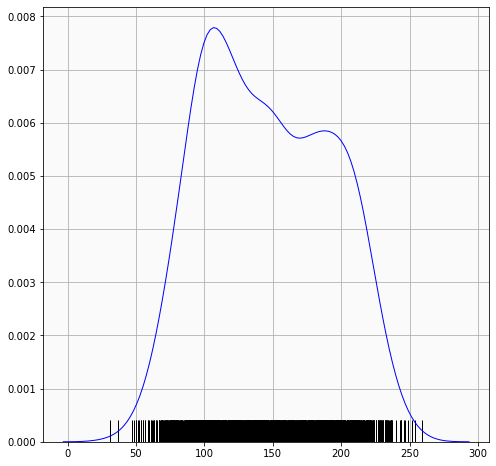

In [3]:
d= d['X'].tolist()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(d, hist = False, kde = True, rug = True,
             color = 'blue', 
             kde_kws={'linewidth': 1},
             rug_kws={'color': 'black'}, ax = ax)
ax = plt.gca()
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

In [4]:
data = []
for i in d:
    data.append([i])

In [5]:
def cols(data, k): #calculates density of each points and its neighbors
    density = []
    nn = []
    for i in data:
        d = NearestNeighbors(n_neighbors=k)
        d.fit(data)
        neighbors = d.kneighbors([i], k, return_distance=True)
        nn.append(neighbors[1][0].tolist())
        dens = 1/(neighbors[0][0][0] - neighbors[0][0][-1])**2
        density.append(dens)
    return density, nn               

In [6]:
def knndata(data, k): #converts the data into the dataframe shown below
    col2, col3 = cols(data, k)
    col1 = []
    for i in data:
        col1.append(i[0])
    d = {'X_k': col1,
        'Density': col2,
        'Neighbors': col3}
    kd = pd.DataFrame(d, columns = ['X_k', 'Density', 'Neighbors'])
    
    return kd

In [7]:
output = knndata(data, 200)

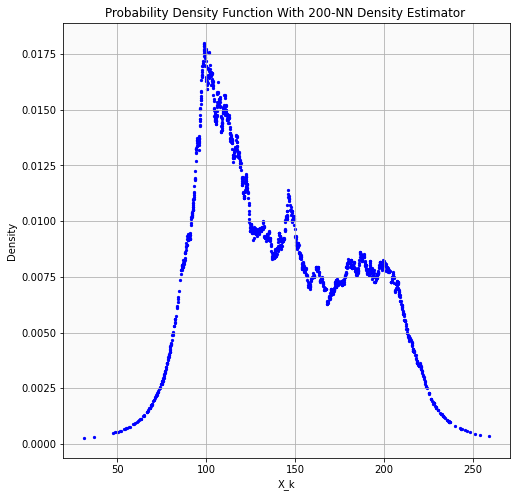

In [8]:
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 5, color= 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 200-NN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

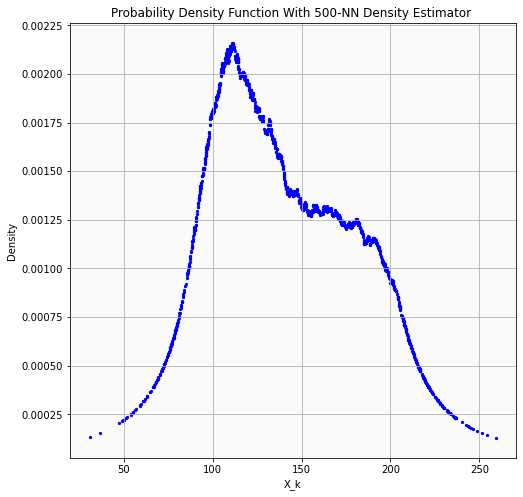

In [9]:
output = knndata(data, 500)
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 5, color= 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 500-NN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

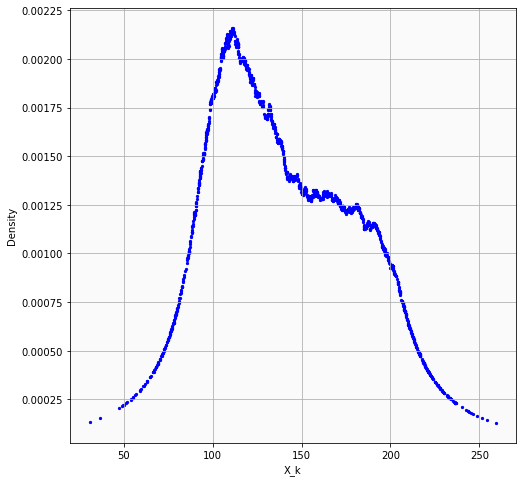

In [29]:
output = knndata(data, 500)
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 5, color= 'blue', figsize=(8,8))
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

In [27]:
def mode_search(data, k): #finds the modes with k neighbors
    knn_data = knndata(data, k)
    best_density = 0
    best_index = -1
    mode_index= []
    for i in knn_data['Neighbors']:
        n_dens = []
        n =[]
        for j in i:
            n_dens.append(knn_data['Density'][j])
            n.append(j)

        if n_dens[0] == max(n_dens):
            mode_index.append(n[np.argmax(n_dens)])
            
    return mode_index

In [12]:
def cluster(data, k): #find which mode each point converges on 
    clusters = []
    knn_data = knndata(data, k)
    modes = mode_search(data, 200)
    
    for i in range(len(knn_data['Neighbors'])):
        l = list(set(knn_data['Neighbors'][i]).intersection(modes))
        j = i

        while len(l) != 1:
            search = knn_data['Neighbors'][j]
            n_dens = []
            n = []
            for k in search:
                n_dens.append(knn_data['Density'][k])
                n.append(k)
                
            max_d = max(n_dens)
            j = n[np.argmax(n_dens)]
            l = list(set(knn_data['Neighbors'][j]).intersection(modes))
        
        clusters.append(str(l[0]))
    knn_data['Cluster'] =  clusters
    knn_data['Cluster'] = le.fit_transform(knn_data['Cluster'])
    return knn_data

In [13]:
output = cluster(data, 200)

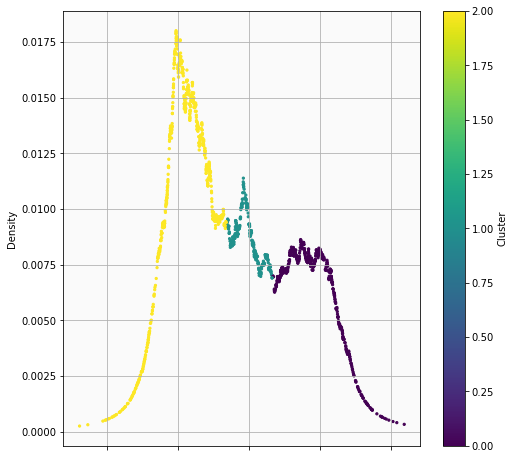

In [14]:
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 5, c = 'Cluster', cmap = 'viridis', figsize=(8,8))
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

In [15]:
x = data[0:200]

In [16]:
d1 = knndata(x, 20)
d2 = knndata(x, 50)
d3 = knndata(x, 100)
d4 = knndata(x, 200)

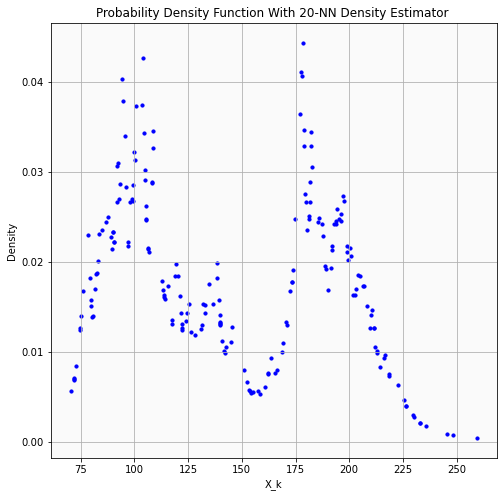

In [17]:
output = d1
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 10, c = 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 20-NN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

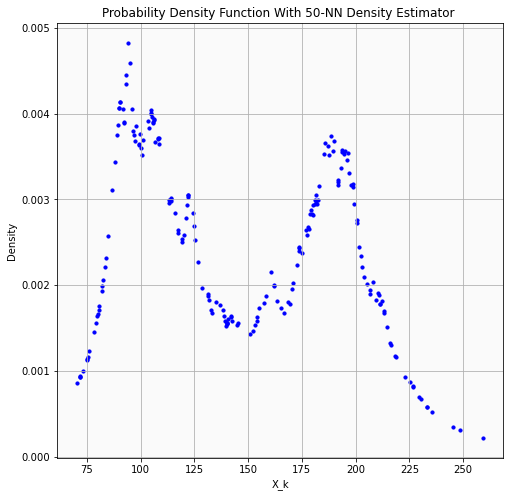

In [18]:
output = d2
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 10, c = 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 50-NN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

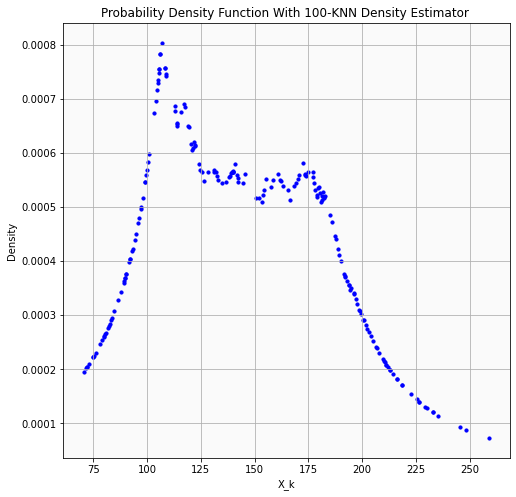

In [19]:
output = d3
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 10, c = 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 100-KNN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

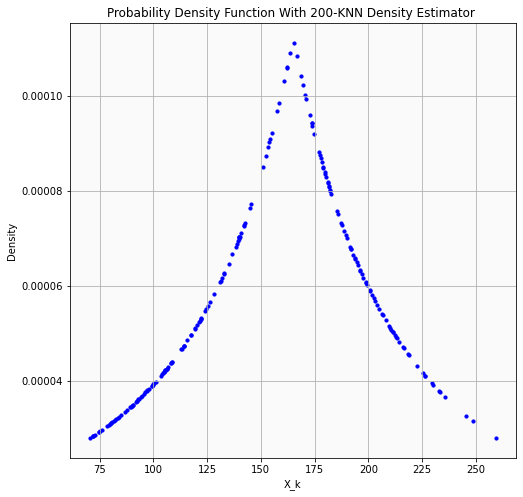

In [20]:
output = d4
ax = output.plot.scatter(x = 'X_k', y = 'Density', s = 10, c = 'blue', figsize=(8,8),
                    title = 'Probability Density Function With 200-KNN Density Estimator ')
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

In [21]:
mode_search(x, 20)

[15, 44, 75, 81, 130, 150]

In [22]:
mode_search(x, 50)

[150, 194]

In [23]:
mode_search(x, 100)

[143, 196]

In [24]:
mode_search(x, 200)

[16]

In [25]:
x[150]

[94.192]